# Introduction

In this notebook, we will perform text detection in images using OCR. We will start with image preprocessing and then conduct OCR using Tesseract, EasyOCR, and KerasOCR. By the end of this notebook, you will understand how to enhance image quality for OCR and extract text effectively from images.



# Install and Import Libraries

In [1]:
!apt-get update
!apt-get install -y tesseract-ocr

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,498 kB]
Fetched 2,755 kB in 3s (891 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as 

In [5]:
!pip install pytesseract
!pip install easyocr
!pip install keras-ocr

In [6]:
import cv2
import pytesseract
import easyocr
import keras_ocr
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Image Preprocessing

---

# **Why do we need to pre-process image before ?**

**Grayscale conversion**

- Converting to Grayscale: Most OCR algorithms work better with grayscale images
- it simplifies the data by reducing the color channels (RGB)
 reducing the computational complexity and improving the clarity of text edges.

**Noise removal**
- Noise create false edges or distort the appearance of characters.
- Noise can come from various sources, like low image quality, compression artifacts, or scanning issues.
Effect: Techniques like Gaussian blur, median filtering, or morphological operations are used to smooth the image and remove unwanted noise. This makes the text stand out more clearly, improving the OCR accuracy.

**Sharpening**
- Sharpening enhances the edges and fine details of the text, making characters more distinct and easier to differentiate
- By increasing the contrast between edges and surrounding areas, sharpening makes the text appear crisper, which is particularly useful when the original image is slightly blurred or the text is faint.

**Binarization**
- Reason: Binarization converts the grayscale image into a binary image (black and white), where the text is typically represented by black pixels, and the background is white. This step is crucial because most OCR algorithms are designed to work with binary images, where the text and background are clearly separated.
- Effect: It simplifies the image, making it easier for the OCR algorithm to identify characters. Adaptive binarization techniques (like Otsu's method) are often used to handle varying lighting conditions across the image, ensuring consistent text detection.


### Helper functions for image pre-processing

In [2]:
# Grayscale conversion
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Noise removal
def remove_noise(image):
    return cv2.medianBlur(image, 15)

# Sharpening
def sharpen_image(image):
    kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])  # Sharpening kernel
    return cv2.filter2D(image, -1, kernel)

# Binarization
def binarize_image(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Helper display function
def display_image(image, title, is_rgb=False):
    if is_rgb:
        # OpenCV loads images in BGR format by default, so we have to convert BGR to RGB for proper color display
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
    else:
        plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


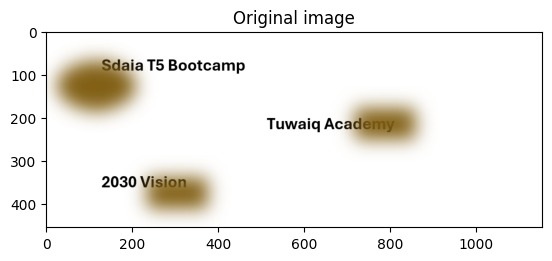

In [7]:
image_path = '/content/drive/MyDrive/نسخة من Basic_OCR_exrecise.png'

img = cv2.imread(image_path)
plt.title("Original image")
plt.imshow(img)


# Text Detection using Tesseract

Draw Bounding Boxes

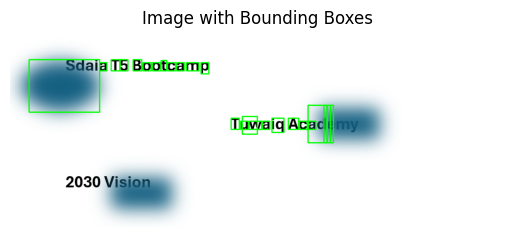

In [8]:
image = cv2.imread(image_path)
processed_img = get_grayscale(image)


boxes = pytesseract.image_to_boxes(processed_img)
boxes_image = image.copy()

for box in boxes.splitlines():
    box = box.split(' ')
    x, y, w, h = int(box[1]), int(box[2]), int(box[3]), int(box[4])
    # Draw the rectangle
    cv2.rectangle(boxes_image, (x, boxes_image.shape[0] - y), (w, boxes_image.shape[0] - h), (0, 255, 0), 2)

display_image(boxes_image, "Image with Bounding Boxes", is_rgb=True)

Extract text

In [9]:
text_tess = pytesseract.image_to_string(processed_img)

print(text_tess)


=" T5 Bootcamp

Tuwaiq Acadia



# Text Detection using EasyOCR

Print the detected words

In [10]:
# # Initializing  EasyOCR reader
reader = easyocr.Reader(['en'])  #  'en' for English language

image = cv2.imread(image_path)

result = reader.readtext(image)

print (result)

for detection in result:
    print(detection[1])

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

[([[124, 55], [471, 55], [471, 106], [124, 106]], 'Sdaia T5 Bootcamp', 0.7350188397642917), ([[507, 190], [819, 190], [819, 242], [507, 242]], 'Tuwaiq Academy', 0.999023855140278), ([[125, 329], [335, 329], [335, 371], [125, 371]], '2030 Vision', 0.8906961194426193)]
Sdaia T5 Bootcamp
Tuwaiq Academy
2030 Vision


Draw bounding box

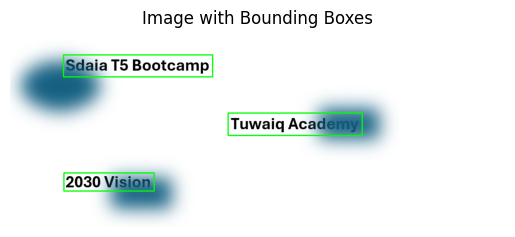

In [11]:
for detection in result:
    bounding_box = detection[0]

    top_left = tuple([int(coord) for coord in bounding_box[0]])
    bottom_right = tuple([int(coord) for coord in bounding_box[2]])


    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

display_image(image, "Image with Bounding Boxes", is_rgb=True)

# Text Detection using KerasOCR

Print the detected words

In [ ]:
# Warning! Don't run this code unless you had an error when creating a pipeline for OCR using KerasOCR in the next code cell
#!pip install tensorflow==2.9.1 keras==2.9.0
# After runnig this code you will have to restart the session and import libraries again

In [14]:

# Create a pipeline for OCR using KerasOCR
pipeline = keras_ocr.pipeline.Pipeline()

image = keras_ocr.tools.read(image_path)

# KerasOCR requires the image to be passed as a list, even if you're working with a single image
images = [image]

# Perform OCR on the image
prediction_groups = pipeline.recognize(images)

# Print the recognized text
for predictions in prediction_groups:
    for prediction in predictions:
        print(prediction[0])


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 5s 5s/step
sdaia
t5
bootcamp
academy
tuwaiq
2030
vision


Draw bounding box

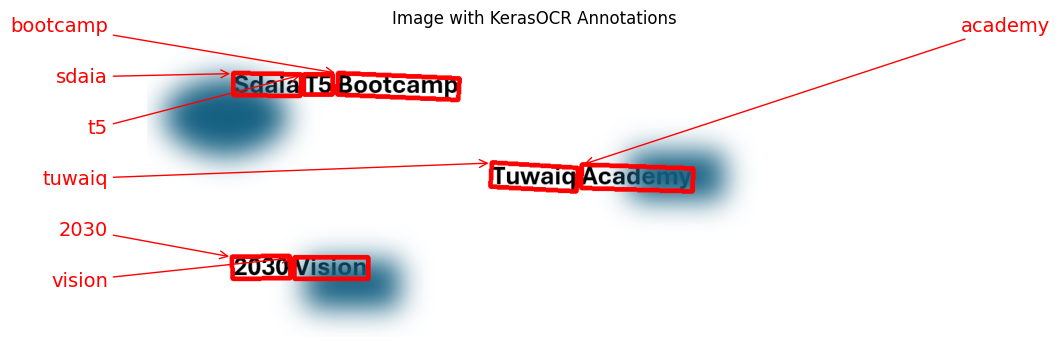

In [13]:

fig, ax = plt.subplots(figsize=(10, 10))
keras_ocr.tools.drawAnnotations(image=images[0], predictions=prediction_groups[0], ax=ax)


plt.title("Image with KerasOCR Annotations")
plt.axis('off')
plt.show()